In [ ]:
Nguyễn Minh Vũ - B22DCVT594

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
Nulls
=====
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age               

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4352\3442549463.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(df.columns)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4352\3442549463.py:45: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  text = ax.text(j, i, round(corr.iloc[i][j],2),


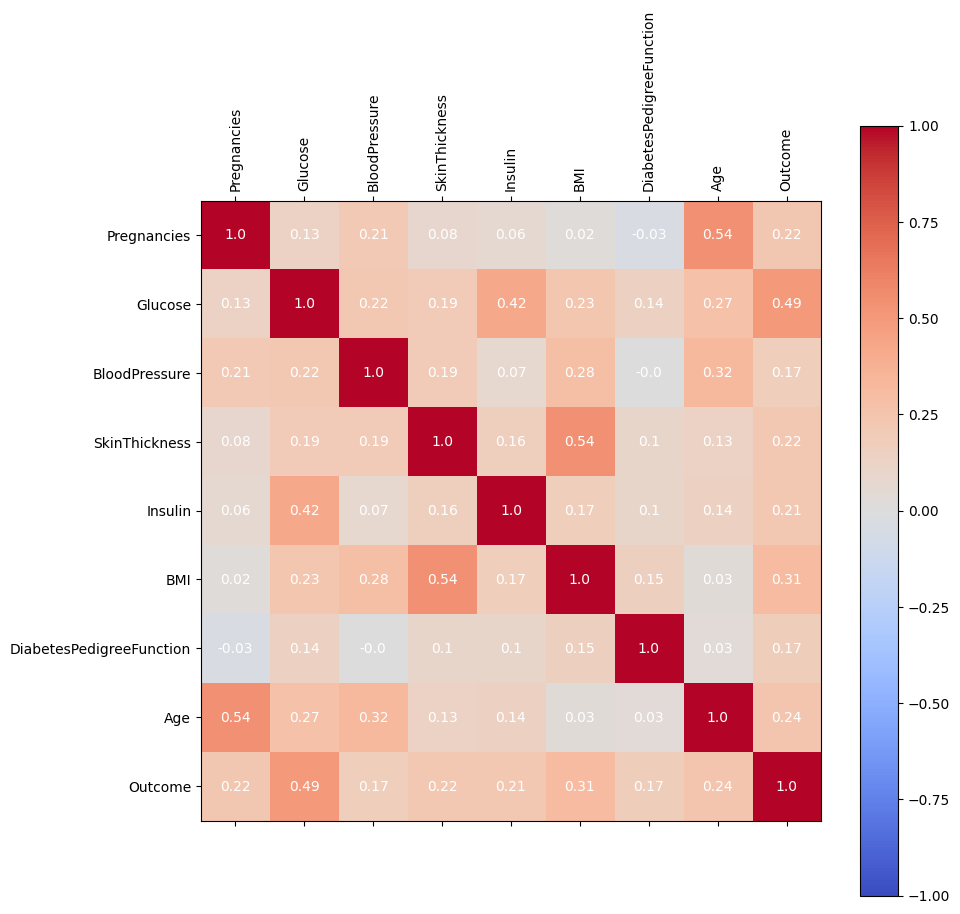

Index(['Outcome', 'Glucose', 'BMI', 'Age'], dtype='object')
[1.         0.49292767 0.31192439 0.23835598]
0.7669856459330144
The optimal number of neighbors is 19
0.7721462747778537
0.7656527682843473
0.765704032809296


C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


[0]
Non-diabetic
[[0.94736842 0.05263158]]
Confidence: 94.74%


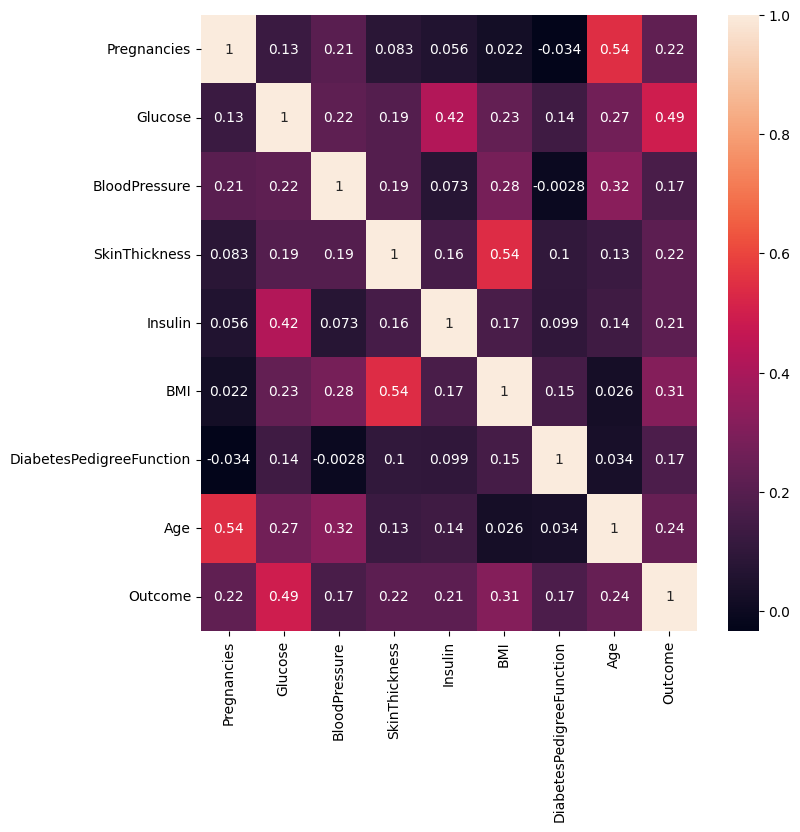

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('diabetes.csv')
df.info()

#---check for null values---
print("Nulls")
print("=====")
print(df.isnull().sum())

#---check for 0s---
print("0s")
print("==")
print(df.eq(0).sum())

df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].replace(0, np.nan)

df.fillna(df.mean(), inplace = True)

print(df.eq(0).sum())

corr = df.corr()
print(corr)

%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)

fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)

ax.set_xticklabels(df.columns)
plt.xticks(rotation = 90)

ax.set_yticklabels(df.columns)
ax.set_yticks(ticks)

#---print the correlation factor---
for i in range(df.shape[1]):
    for j in range(9):
        text = ax.text(j, i, round(corr.iloc[i][j],2),
                        ha="center", va="center", color="w")
plt.show()

import seaborn as sns
sns.heatmap(df.corr(),annot=True)
#---get a reference to the current figure and set its size---
fig = plt.gcf()
fig.set_size_inches(8,8)

#---get the top four features that has the highest correlation---
print(df.corr().nlargest(4, 'Outcome').index)

#---print the top 4 correlation values---
print(df.corr().nlargest(4, 'Outcome').values[:,8])

from sklearn import linear_model
from sklearn.model_selection import cross_val_score
#---features---
X = df[['Glucose','BMI','Age']]

#---label---
y = df.iloc[:,8]

log_regress = linear_model.LogisticRegression()
log_regress_score = cross_val_score(log_regress, X, y, cv=10,
scoring='accuracy').mean()

print(log_regress_score)

result = []
result.append(log_regress_score)

from sklearn.neighbors import KNeighborsClassifier
#---empty list that will hold cv (cross-validates) scores---
cv_scores = []

#---number of folds---
folds = 10

#---creating odd list of K for KNN---
ks = list(range(1,int(len(X) * ((folds - 1)/folds)), 2))

#---perform k-fold cross validation---
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=folds, scoring='accuracy').mean()
    cv_scores.append(score)

#---get the maximum score---
knn_score = max(cv_scores)

#---find the optimal k that gives the highest score---
optimal_k = ks[cv_scores.index(knn_score)]

print(f"The optimal number of neighbors is {optimal_k}")
print(knn_score)
result.append(knn_score)

from sklearn import svm

linear_svm = svm.SVC(kernel='linear')
linear_svm_score = cross_val_score(linear_svm, X, y, cv=10, scoring='accuracy').mean()

print(linear_svm_score)
result.append(linear_svm_score)

rbf = svm.SVC(kernel='rbf')
rbf_score = cross_val_score(rbf, X, y, cv=10, scoring='accuracy').mean()
print(rbf_score)
result.append(rbf_score)

algorithms = ["Logistic Regression", "K Nearest Neighbors", "SVM Linear Kernel", "SVM RBF Kernel"]
cv_mean = pd.DataFrame(result,index = algorithms)
cv_mean.columns=["Accuracy"]
cv_mean.sort_values(by="Accuracy",ascending=False)

knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X, y)

import pickle

#---save the model to disk---
filename = 'diabetes.sav'

#---write to the file using write and binary mode---
pickle.dump(knn, open(filename, 'wb'))

#---load the model from disk---
loaded_model = pickle.load(open(filename, 'rb'))

Glucose = 65
BMI = 70
Age = 50

prediction = loaded_model.predict([[Glucose, BMI, Age]])
print(prediction)
if (prediction[0]==0):
    print("Non-diabetic")
else:
    print("Diabetic")

proba = loaded_model.predict_proba([[Glucose, BMI, Age]])
print(proba)
print("Confidence: " + str(round(np.amax(proba[0]) * 100 ,2)) + "%")

In [ ]:
Nguyễn Minh Vũ - B22DCVT594